In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [2]:
# use the auto data as example
auto = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/lectures/lecture_3/auto_mpg.csv")
auto.dropna(inplace=True)  # for the sake of simplicity
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [3]:
numerical_features = [
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
]

X_train, X_validation, y_train, y_validation = train_test_split(
    auto[numerical_features], 
    auto["mpg"], 
    test_size=0.2, 
    random_state=42,
)

all_models = []
rmse = pd.DataFrame(columns=["alpha", "train", "validation"])

for alpha in np.logspace(start=-3, stop=.2, num=50):
    model = Ridge(alpha=alpha, normalize=True)
    model.fit(X=X_train, y=y_train)
    all_models.append(model)
    
    y_pred_train = model.predict(X_train)
    y_pred_validation = model.predict(X_validation)
    row = {
        "alpha": alpha,
        "train": np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train)),
        "validation": np.sqrt(mean_squared_error(y_true=y_validation, y_pred=y_pred_validation)),
    }
    rmse = rmse.append(row, ignore_index=True)
rmse.tail()

,alpha,train,validation
45,0.868511,4.587953,4.210900
46,1.009443,4.657502,4.239972
47,1.173242,4.737644,4.279573
48,1.363622,4.828979,4.331073
49,1.584893,4.931827,4.395570


<IPython.core.display.Javascript object>


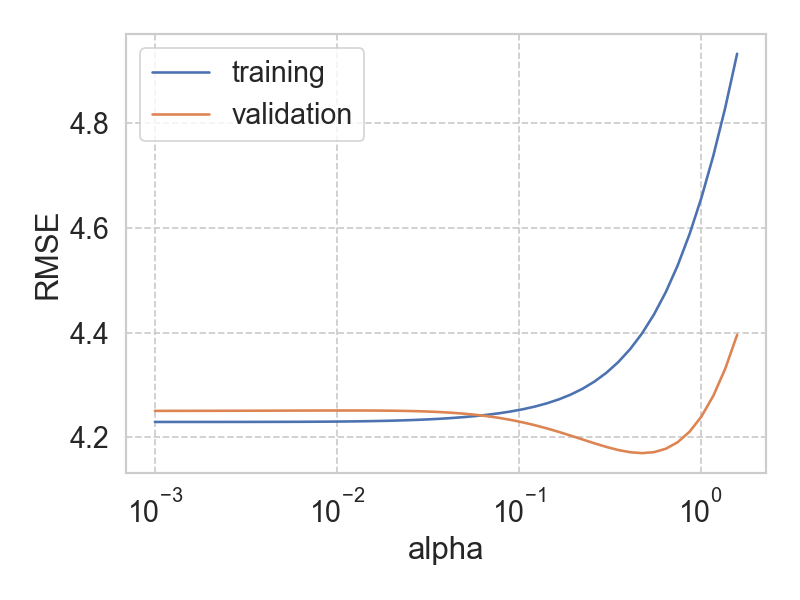

In [4]:
plt.figure()
sns.lineplot(x="alpha", y="train", data=rmse, label="training")
sns.lineplot(x="alpha", y="validation", data=rmse, label="validation")

plt.gca().set_ylabel("RMSE")
plt.gca().set_xscale("log")
plt.tight_layout()